<a href="https://colab.research.google.com/github/xychong/edgeaimonitoring/blob/main/MobileNet_V2_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import tensorflow.compat.v2 as tf
import keras
from keras.models import Sequential
from keras.applications import mobilenet_v2

import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.6.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train_data = np.load("/content/drive/MyDrive/FYP Data/Train and Test/train_data.npy", allow_pickle = True)
test_data = np.load("/content/drive/MyDrive/FYP Data/Train and Test/test_data.npy", allow_pickle = True)
train_label = np.load("/content/drive/MyDrive/FYP Data/Train and Test/train_label.npy", allow_pickle = True)
test_label = np.load("/content/drive/MyDrive/FYP Data/Train and Test/test_label.npy", allow_pickle = True)

In [5]:
print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

(1204, 224, 224, 3)
(304, 224, 224, 3)
(1204, 1)
(304, 1)


In [6]:
original_model = keras.applications.mobilenet_v2.MobileNetV2()

In [7]:
# Original MobileNetV2 architecture
original_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [13]:
from keras.applications.mobilenet_v2 import MobileNetV2
from keras import layers, optimizers

### https://blog.roboflow.com/how-to-train-mobilenetv2-on-a-custom-dataset/

In [14]:
# Instantiates MobileNetV2 architecture 
mobilenet = MobileNetV2(input_shape=(224,224,3), include_top=False)
model = Sequential()
model.add(mobilenet)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 2,230,277
Non-trainable params: 34,112
_________________________________________________________________


In [28]:
# Configuring the model
# Use crossentropy loss function when there are two or more label classes
# Labels are provided as integers
# Adjust learning rate to reduce loss
#model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [29]:
# Train the model
training = model.fit(train_data, train_label, epochs=20, validation_data=(test_data, test_label), verbose=1)

Epoch 1/20
38/38 [==============================] - 274s 7s/step - loss: 0.0128 - accuracy: 0.9950 - val_loss: 5.4257 - val_accuracy: 0.6250
Epoch 2/20
38/38 [==============================] - 254s 7s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 4.6980 - val_accuracy: 0.6678
Epoch 3/20
38/38 [==============================] - 219s 6s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 3.7413 - val_accuracy: 0.6908
Epoch 4/20
38/38 [==============================] - 222s 6s/step - loss: 0.0046 - accuracy: 0.9983 - val_loss: 2.3809 - val_accuracy: 0.7928
Epoch 5/20
38/38 [==============================] - 265s 7s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.5195 - val_accuracy: 0.8487
Epoch 6/20
38/38 [==============================] - 266s 7s/step - loss: 0.0198 - accuracy: 0.9967 - val_loss: 0.6040 - val_accuracy: 0.9178
Epoch 7/20
38/38 [==============================] - 242s 6s/step - loss: 6.8872e-04 - accuracy: 1.0000 - val_loss: 0.5763 - val_accuracy: 0.9309
Epoch 8/2

In [22]:
test_loss, test_acc = model.evaluate(test_data, test_label)

print("Tested Acc:", test_acc)

10/10 [==============================] - 8s 778ms/step - loss: 7.0265 - accuracy: 0.5493
Tested Acc: 0.5493420958518982


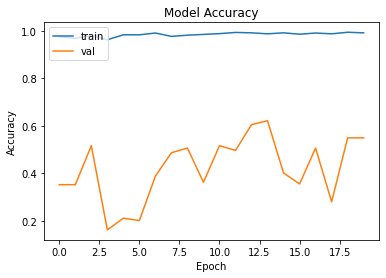

In [26]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

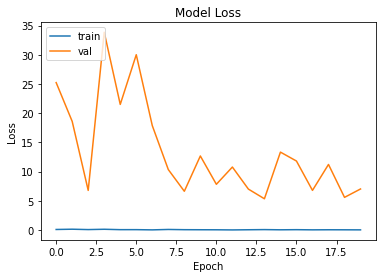

In [27]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()